<a href="https://colab.research.google.com/github/solanods/projetos_faculdade/blob/main/Projeto_II_Futuro_dos_Dados_e_Aplica%C3%A7%C3%A3o_de_Big_Data_ETAPA_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

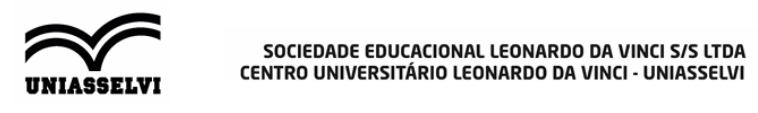

**Nome do Acadêmico:** Solano Cruz Júnior

**Matrícula:** 2919585

# Projeto II - Futuro dos Dados e Aplicação de Big Data - Etapa I

## Descrição do Tema
Clusterização de dados utilizando redução de dimensionalidade e o algoritimo
K-Means


>## Objetivo


Analisar os dados a fim de agrupá-los em clusters de acordo com a sua similaridade.

>## Especificação Técnica



Informações do dataset

O arquivo household_power_consumption.txt contém 2075259 medições de consumo de energia elétrica residencial individual, reunidas em uma casa localizada em Sceaux (7km de Paris, França) entre dezembro de 2006 e novembro de 2010 (47 meses). A taxa de amostragem é de um minuto por amostra.

Notas:
1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) representa a energia ativa consumida a cada minuto (em watt-hora) no domicílio por equipamentos elétricos não medidos em sub-meterings 1, 2 and 3.

2.O conjunto de dados contém alguns valores ausentes nas medições (cerca de 25% das linhas). Todos os registros de data/hora do calendário estão presentes no conjunto de dados, mas para alguns registros de data/hora, os valores de medição estão ausentes: um valor ausente é representado pela ausência de valor entre dois separadores de atributo ponto-e-vírgula consecutivos. Por exemplo, o conjunto de dados mostra valores ausentes em 28 de abril de 2007.

Atributos:

1 date: data no formato dd/mm/yyyy

2 hour: hora no formato hh:mm:ss

3 global_active_power: potência ativa média global doméstica por minuto. É a potência real e é medida em quilowatts.

4 global_reactive_power: potência reativa média global doméstica por minuto (em quilowatts). É a potência que não realiza qualquer trabalho de forma efetiva, ou seja, diretamente. Esta apenas cria e mantém os campos eletromagnéticos das cargas indutivas dos equipamentos elétricos.

5 voltage: tensão média por minuto (em volts)

6 global_intensity: intensidade de corrente média global doméstica por minuto (em amperes)

7 sub_metering_1: Sub-medição 1.
Corresponde à cozinha, contendo principalmente máquina de lavar louça, forno e microondas (em watt-hora).

8 sub_metering_2: Sub-medição 2. Corresponde à lavanderia, contendo máquina de lavar, secadora e geladeira (em watt-hora).

9 sub_metering_3: Sub-medição 3.Corresponde a um aquecedor elétrico de água e um ar condicionado (em watt-hora).


Com relação aos tipos de dados, a maioria dos campos do dataset vem como objeto e serão transformados para numérico(float).

O processo de clusterização na base original apresentou alguns entraves. Uma vez que o processo envolve milhares de cálculos algébricos, foi comum a extrapolação do limite de processamento e armazenamento tanto utilizando o Google Colab, quando o Jupyter Notebook (este localmente). Para que a didática não fosse comprometida, optou-se por utilizar uma amostra de 1% do dataset original (20492 registros).

Sobre os principais métodos e funções de machine learning a serem utilizados:

train_test_split: redução do dataset em uma amostra


PCA: redução linear da dimensionalidade

KMeans: algoritmo de clusterização

silhouette_score: métrica de avaliação da qualidade do algoritmo



In [ ]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist, pdist
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**ANÁLISE EXPLORATÓRIA E PRÉ-PROCESSAMENTO DOS DADOS**

In [ ]:
# Carregamento dos dados
dataset = pd.read_csv('drive/MyDrive/household_power_consumption.txt', delimiter=';', low_memory=False)

In [ ]:
# Explorar as primeiras linhas
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
# Formato do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [ ]:
# Verificar os valores nulos por coluna
dataset.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [ ]:
# Remover  os valores nulos
dataset = dataset.dropna()

In [ ]:
# Verificar a maior e menor valor de potência ativa e em que data ocorreu
dataset.sort_values(by="Global_active_power", ascending=False)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1029774,30/11/2008,20:18:00,9.994,0.056,231.680,43.000,36.000,70.000,17.0
968163,19/10/2008,01:27:00,9.938,0.282,228.480,43.400,35.000,67.000,17.0
112451,4/3/2007,19:35:00,9.922,0.414,230.170,43.200,34.000,70.000,16.0
1546693,24/11/2009,19:37:00,9.732,0.378,231.540,42.000,36.000,69.000,17.0
1546692,24/11/2009,19:36:00,9.726,0.370,231.630,42.000,36.000,70.000,17.0
...,...,...,...,...,...,...,...,...,...
894448,28/8/2008,20:52:00,0.076,0.000,233.920,0.200,0.000,0.000,0.0
894447,28/8/2008,20:51:00,0.076,0.000,234.030,0.200,0.000,0.000,1.0
894446,28/8/2008,20:50:00,0.076,0.000,234.060,0.200,0.000,0.000,1.0
894445,28/8/2008,20:49:00,0.076,0.000,234.340,0.200,0.000,0.000,0.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049280 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 156.3+ MB


In [ ]:
# Remover as colunas de data e hora e converter as restantes de object para float
dataset = dataset.iloc[:, 2:].astype(float)

In [ ]:
# Agora temos todas variáveis numéricas em formato float64
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049280 entries, 0 to 2075258
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 125.1 MB


In [ ]:
# Verificar resumo estatístico dos dados e arredondar para três casas decimais
np.round(dataset.describe(include="all"), 3)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2049280.000,2049280.000,2049280.00,2049280.000,2049280.000,2049280.000,2049280.000
mean,1.092,0.124,240.84,4.628,1.122,1.299,6.458
std,1.057,0.113,3.24,4.444,6.153,5.822,8.437
min,0.076,0.000,223.20,0.200,0.000,0.000,0.000
25%,0.308,0.048,238.99,1.400,0.000,0.000,0.000
50%,0.602,0.100,241.01,2.600,0.000,0.000,1.000
75%,1.528,0.194,242.89,6.400,0.000,1.000,17.000
max,11.122,1.390,254.15,48.400,88.000,80.000,31.000


In [ ]:
# Obter os valores de cada coluna em formato de array
variaveis_entrada = dataset.values
variaveis_entrada

array([[  4.216,   0.418, 234.84 , ...,   0.   ,   1.   ,  17.   ],
       [  5.36 ,   0.436, 233.63 , ...,   0.   ,   1.   ,  16.   ],
       [  5.374,   0.498, 233.29 , ...,   0.   ,   2.   ,  17.   ],
       ...,
       [  0.938,   0.   , 239.82 , ...,   0.   ,   0.   ,   0.   ],
       [  0.934,   0.   , 239.7  , ...,   0.   ,   0.   ,   0.   ],
       [  0.932,   0.   , 239.55 , ...,   0.   ,   0.   ,   0.   ]])

In [ ]:
# Coleta x% dos dados como amostra e atribui a um novo dataset
dataset_treino, dataset_teste = train_test_split(variaveis_entrada, train_size=.01)

In [ ]:
dataset_treino.shape

(20492, 7)

In [ ]:
dataset_teste.shape

(2028788, 7)

**REDUÇÃO DOS DADOS COM PCA**

Nesta etapa utlizaremos uma  técnica de aprendizagem não supervisionada chamada PCA (Principal Component Analysis) para redução das sete variáveis em componentes principais. A técnica consiste em juntar as variáveis através de um cálculo algébrico, agrupando-as de acordo com a medição da variância. A partir de então é possível obter uma redução da dimensionalidade do problema (quantidade de dados)

In [ ]:
# Criar um novo dataframe pandas a partir dos dados do array
matriz_correlacao = pd.DataFrame(dataset_treino, columns=dataset.columns)

In [ ]:
# Criar a matriz de correlações
matriz_correlacao = matriz_correlacao.corr()
matriz_correlacao

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.248623,-0.399817,0.998820,0.490197,0.438209,0.643019
Global_reactive_power,0.248623,1.000000,-0.112247,0.268461,0.130517,0.142229,0.089185
Voltage,-0.399817,-0.112247,1.000000,-0.411436,-0.194851,-0.172332,-0.270200
Global_intensity,0.998820,0.268461,-0.411436,1.000000,0.495093,0.444155,0.630118
Sub_metering_1,0.490197,0.130517,-0.194851,0.495093,1.000000,0.063456,0.108528
Sub_metering_2,0.438209,0.142229,-0.172332,0.444155,0.063456,1.000000,0.083016
Sub_metering_3,0.643019,0.089185,-0.270200,0.630118,0.108528,0.083016,1.000000


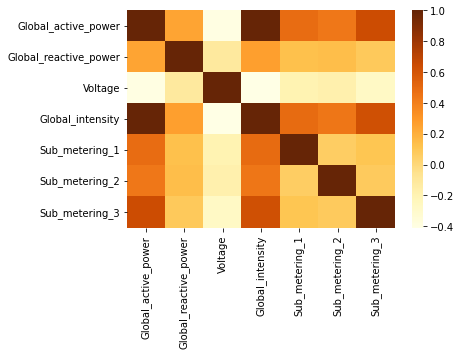

In [ ]:
# Plotar um heatmap das correlações para facilitar a interpretação
sns.heatmap(matriz_correlacao, cmap="YlOrBr")

0.7 a 0.9 positivo ou negativo indica uma correlação forte.

0.5 a 0.7 positivo ou negativo indica uma correlação moderada.

0.3 a 0.5 positivo ou negativo indica uma correlação fraca.

0 a 0.3 positivo ou negativo indica uma correlação desprezível.

As correlações com maior peso encontram-se entre as variáveis Global_active_power e Global_intensity, e entre estas com Sub_metering_3

In [ ]:
# Aplicar a redução de dimensionalidade no array das variáveis
# O valor colocado em n_components é arbitrário, deve ser menor que o número de variáveis originais
# No exemplo vamos reduzir as sete variáveis em duas principais
pca = PCA(n_components=2).fit_transform(dataset_treino)
pca

array([[-7.63062848,  0.37648519],
       [-6.02235475,  1.06428979],
       [10.70346644, -6.48953437],
       ...,
       [10.7957514 , -5.13356401],
       [-7.55701939,  0.4236002 ],
       [11.87653023, -4.44120596]])

**K-MEANS**

In [ ]:
# Determinar um range para o número de clusters ideal
k_range = range(1,12)
k_range

range(1, 12)

Curva de Elbow ou Método do Cotovelo

Quando a gente não sabe quantos clusters nossas amostras podem formar, nós precisamos utilizar uma forma de validar o que encontramos no lugar de um chutômetro.

E é aí que entra o Método Cotovelo, a ideia é rodar o KMeans para vários quantidades diferentes de clusters e dizer qual dessas quantidades é o número ótimo de clusters. O que geralmente acontece ao aumentar a quantidade de clusters no KMeans é que as diferenças entre clusters se tornam muito pequenas, e as diferenças das observações intra-clusters vão aumentando. Então é preciso achar um equilíbrio em que as observações que formam cada agrupamento sejam o mais homogêneas possível e que os agrupamentos formados sejam o mais diferentes um dos outros.

In [ ]:
# Aplicar o K-means para cada valor em k_range. Essa linha vai retornar uma lista com 11 máquinas preditivas
k_means_modelos = [KMeans(n_clusters = k).fit(pca) for k in k_range]


In [ ]:
k_means_modelos

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9),
 KMeans(n_clusters=10),
 KMeans(n_clusters=11)]

In [ ]:
# Criar o centroide do cluster para cada modelo
centroides = [x.cluster_centers_ for x in k_means_modelos]

In [ ]:
centroides

[array([[6.00417627e-15, 3.11698961e-15]]), array([[-6.39165332,  1.34834523],
        [11.85037451, -2.49988464]]), array([[-6.66069633,  0.80669875],
        [10.76315586, -4.99452883],
        [17.75131565, 24.48676714]]), array([[-6.68384228,  0.76589599],
        [10.74780113, -5.0084178 ],
        [23.78990795, 22.21231928],
        [ 6.2988251 , 26.77768874]]), array([[10.65381563, -5.17343019],
        [-6.69370268,  0.75021742],
        [ 5.390977  , 24.96871111],
        [25.14537841, 29.42093466],
        [19.57133738, 10.74020019]]), array([[-6.72446255,  0.70355504],
        [10.65381563, -5.17343019],
        [ 8.44135133, 33.19883929],
        [19.56042038, 10.70286267],
        [25.86412396, 28.30541978],
        [ 2.28274705, 15.65679178]]), array([[10.65381563, -5.17343019],
        [-6.72446255,  0.70355504],
        [ 7.96124623, 32.34519155],
        [24.65008064, 26.02717261],
        [ 2.24178818, 15.59022201],
        [19.51706126, 10.61000836],
        [32.5557

In [ ]:
# Calcular a distancia euclidiana de cada ponto de dado para o centroide
dist_euclidianas = [cdist(pca, centroide, 'euclidean') for centroide in centroides]
menor_dist_euclidianas = [np.min(distancia, axis=1) for distancia in dist_euclidianas]

In [ ]:
menor_dist_euclidianas

[array([ 7.63991048,  6.11567409, 12.51711828, ..., 11.95415106,
         7.5688823 , 12.6797587 ]),
 array([1.57466549, 0.46590656, 4.1512291 , ..., 2.8369873 , 1.48769334,
        1.94149751]),
 array([1.06106177, 0.68835537, 1.49619664, ..., 0.14280494, 0.97476126,
        1.24328947]),
 array([1.02374063, 0.72567528, 1.48177997, ..., 0.13401792, 0.93787242,
        1.26323341]),
 array([1.0087149 , 0.74118115, 1.3170404 , ..., 0.1474282 , 0.92303551,
        1.4251959 ]),
 array([0.96338538, 0.78935728, 1.3170404 , ..., 0.1474282 , 0.87836531,
        1.4251959 ]),
 array([0.96338538, 0.78935728, 1.3170404 , ..., 0.1474282 , 0.87836531,
        1.4251959 ]),
 array([0.93857656, 0.81205221, 1.25326814, ..., 0.2937075 , 0.85315911,
        1.18238032]),
 array([0.93857656, 0.81205221, 1.30714243, ..., 0.0526503 , 0.85315911,
        1.30864109]),
 array([0.53870385, 1.23022075, 1.30708546, ..., 0.05281382, 0.45914789,
        1.30818579]),
 array([0.54913345, 1.21888022, 0.93373288, 

In [ ]:
# Soma dos quadrados dentro de cada cluster
soma_quadrados_dentro_cluster = [sum(d**2) for d in menor_dist_euclidianas]

In [ ]:
soma_quadrados_dentro_cluster

[2618116.0876553645,
 996905.7807634437,
 276817.2281659505,
 207379.36240775936,
 157369.95581575856,
 131051.94704737143,
 111248.96134725898,
 91537.0931848012,
 74809.88710572594,
 60753.775470253786,
 49618.1993324008]

In [ ]:
# Soma total dos quadrados
soma_total = sum(pdist(pca)**2)/len(pca)

In [ ]:
# Soma dos quadrados entre clusters
soma_quadrados_entre_clusters = soma_total - soma_quadrados_dentro_cluster

Text(0, 0.5, 'Variância Explicada para cada valor de K')

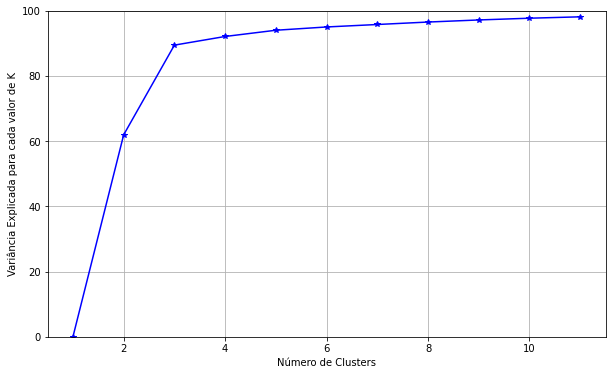

In [ ]:
# Curva de Elbow
figura = plt.figure(figsize=[10, 6])
ax = figura.add_subplot(111)
ax.plot(k_range, soma_quadrados_entre_clusters/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Número de Clusters')
plt.ylabel('Variância Explicada para cada valor de K')

Com oito clusters se explica mais de 90% da variância

In [ ]:
# Criar modelo com K=8
modelo_8 = KMeans(n_clusters=8)
modelo_8.fit(pca)

KMeans()

**AVALIAÇÃO DO MODELO PREDITIVO**

In [ ]:
# Obter valor mínimos e máximos

In [ ]:
x_min, x_max = pca[:, 0].min() - 5, pca[:, 0].max() - 1
y_min, y_max = pca[:, 1].min() + 5, pca[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = modelo_8.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

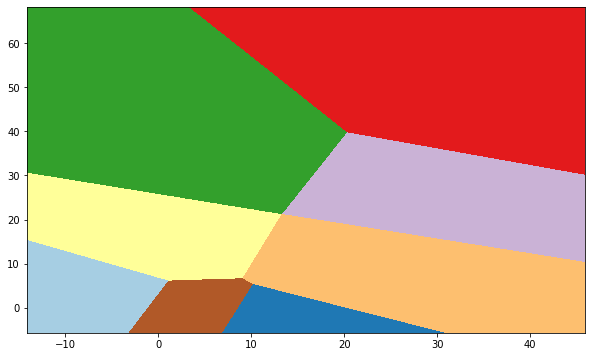

In [ ]:
# Plot das áreas dos clusters
plt.figure(figsize=[10, 6])
plt.clf()
plt.imshow(Z,
           interpolation='nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Paired,
           aspect='auto',
           origin='lower')

 **MÉTRICA DE AVALIAÇÃO DA CLUSTERIZAÇÃO   - SILHOUETTE SCORE**

In [ ]:
# O melhor valor é 1 e o pior valor é -1
?silhouette_score

In [ ]:
# Avaliação
labels = modelo_8.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.7978674659850054

In [ ]:
for i in range(2, 12):
  modelo = KMeans(n_clusters=i)
  modelo.fit(pca)
  labels = modelo.labels_
  print('Com ', i, ' clusters o score é', silhouette_score(pca, labels, metric = 'euclidean') )

Com  2  clusters o score é 0.7894866503423295
Com  3  clusters o score é 0.8548011175822474
Com  4  clusters o score é 0.8576094067572698
Com  5  clusters o score é 0.8591382322705318
Com  6  clusters o score é 0.8603123521862214
Com  7  clusters o score é 0.8615549213800237
Com  8  clusters o score é 0.7978674659850054
Com  9  clusters o score é 0.7798398080036214
Com  10  clusters o score é 0.6646578675572744
Com  11  clusters o score é 0.6199793924666794


Feita a avaliação, descobriu-se que o melhor valor de k é 5

**APLICAR A CLUSTERIZAÇÃO NA BASE DE DADOS**

In [ ]:
# Criar modelo com K=5
modelo_5 = KMeans(n_clusters=5)
modelo_5.fit(pca)

KMeans(n_clusters=5)

In [ ]:
# Criar o dataframe
cluster_data = pd.DataFrame(dataset_treino, columns=dataset.columns)

In [ ]:
# Criar coluna com as labels
cluster_data['Cluster'] = modelo_5.labels_

In [ ]:
cluster_data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Cluster
0,0.246,0.056,241.51,1.0,0.0,0.0,0.0,0
1,0.274,0.144,239.73,1.4,0.0,2.0,1.0,0
2,1.332,0.094,240.12,5.6,0.0,0.0,19.0,1
3,0.184,0.000,242.30,0.8,0.0,0.0,1.0,0
4,0.230,0.124,243.84,1.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...
20487,1.934,0.542,241.55,8.6,0.0,0.0,1.0,0
20488,0.250,0.108,239.81,1.0,0.0,0.0,1.0,0
20489,2.108,0.090,243.76,8.6,0.0,1.0,18.0,1
20490,0.258,0.000,241.56,1.2,0.0,0.0,0.0,0


In [ ]:
cluster_data['Cluster'].value_counts()

0    12967
1     6452
4      378
3      356
2      339
Name: Cluster, dtype: int64

In [ ]:
x_min, x_max = pca[:, 0].min() - 5, pca[:, 0].max() - 1
y_min, y_max = pca[:, 1].min() + 5, pca[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = modelo_5.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

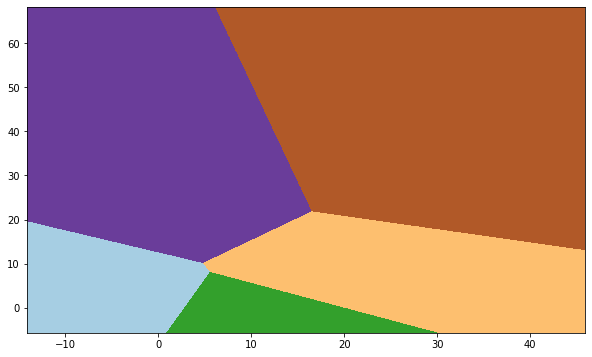

In [ ]:
# Plot das áreas dos clusters
plt.figure(figsize=[10, 6])
plt.clf()
plt.imshow(Z,
           interpolation='nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Paired,
           aspect='auto',
           origin='lower')